In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy.io import fits
from matplotlib_venn import venn3, venn3_circles
import matplotlib.lines as lines
from astropy import constants as const
from astropy.io import fits
import astropy.coordinates as coord
import astropy.units as u
from astropy.table import Table
# import ephem
from astropy.cosmology import FlatLambdaCDM


## Constants pulled directly from Becky's Repository ;)

In [2]:
#---------------------------------------------------------
#Constants, taken from mass_SFR.py done by former students
#---------------------------------------------------------
Mag_sun_w1 = 3.254
Mag_sun_error_w1 = np.sqrt(0.008**2+0.02**2) #extra 0!!
Mag_sun_kt = 3.302
Mag_sun_error_kt = np.sqrt(0.008**2+0.02**2)
lum_sun = 3.828e26 #in W from NASA fact sheet
c = const.c.to('km/s').value #c in km/s
nu_3 = (c*1000)/(11.5608e-6) #in s^-1 from Table 1 in Jarrett et al. (2011) (link: http://iopscience.iop.org/article/10.1088/0004-637X/735/2/112/pdf)
zp_3 = 31.674 #in Jy Table 1 this WISE guide: http://wise2.ipac.caltech.edu/docs/release/allsky/expsup/sec4_4h.html#example
a_3 = [1.13, 10.24] #Cluver14
a_4 = [0.82, 7.3] #Cluver14
h0 = 73.8 #h0 in km/(Mpc*s) Riess2011
h0_error = 2.4 # km/(Mpc*s)
parsec = 3.08567758e16 #m
jansky = 1e-26 #W/m^2/Hz
cosmo = FlatLambdaCDM(h0, Om0=0.262) # Shawn: to match cosmology used by Becky

## Read in all data from .csv files.

In [3]:
# Reading in Data
spec = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/final_sample.csv')
spec_in_gama = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/spec_in_gama.csv')
spec_with_mass = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/spec_with_mass.csv')

mac = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/linkstable_trimmed.csv')
mac_in_gama = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/mac_in_gama.csv')
mac_in_gama_withgamaid = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/mac_in_gama_withgamaid.csv')
mac_with_mass = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/mac_with_mass.csv')

zoo_in_gama = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/zoo_in_gama.csv')
zoo_in_gama_found_lens = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/zoo_in_gama_found_lens.csv')
zoo_20 = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/zoo_20.csv')
zoo_with_mass = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/zoo_with_mass.csv')
zoo_lens_with_mass = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/zoo_lens_with_mass.csv')
zoo_lens20_with_mass = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/zoo_lens20_with_mass.csv')

mac_and_spec_matches = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/mac_and_spec_matches.csv')
mac_and_zoo_matches = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/mac_and_zoo_matches.csv')
spec_and_zoo_matches = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/spec_and_zoo_matches.csv')

## Tables of data for Mac, Spec, and Zoo

In [4]:
# Spec shows 85 objects in G09, G12, and G15
spec_in_gama

,Unnamed: 0,Unnamed: 0.1,RA,DEC,z1,z2,spec_type,GAMA_ID
0,0,0,138.28150,-0.66673,0.163,0.321,PG+ELG,198082
1,1,1,129.69546,-0.38179,0.418,0.738,PG+ELG,202448
2,2,2,136.63883,-0.35203,0.282,0.449,PG+ELG,204140
3,3,3,132.36771,0.16360,0.128,0.603,PG+ELG,209222
4,4,4,132.61013,0.11972,0.313,0.608,PG+ELG,209295
5,5,5,134.02979,0.15244,0.167,0.158,PG+ELG,209584
6,6,6,140.14187,0.97341,0.586,0.336,PG+ELG,279956
7,7,7,135.32929,1.22984,0.487,0.247,PG+ELG,301818
8,8,8,138.94058,1.33144,0.593,0.404,PG+ELG,302719
9,9,9,130.73717,1.55957,0.416,0.350,PG+ELG,323200


In [5]:
# Spec with mass for those objects which were measured (still no count)
spec_with_mass

,Unnamed: 0,Unnamed: 0.1,RA,DEC,z1,z2,spec_type,GAMA_ID,STELLAR_MASS,Z
0,0,0,138.28150,-0.66673,0.163,0.321,PG+ELG,198082,3.025000e+10,0.1632
1,1,1,129.69546,-0.38179,0.418,0.738,PG+ELG,202448,NaN,NaN
2,2,2,136.63883,-0.35203,0.282,0.449,PG+ELG,204140,8.578000e+10,0.2818
3,3,3,132.36771,0.16360,0.128,0.603,PG+ELG,209222,1.425000e+10,0.1277
4,4,4,132.61013,0.11972,0.313,0.608,PG+ELG,209295,8.456000e+10,0.3126
5,5,5,134.02979,0.15244,0.167,0.158,PG+ELG,209584,NaN,NaN
6,6,6,140.14187,0.97341,0.586,0.336,PG+ELG,279956,NaN,NaN
7,7,7,135.32929,1.22984,0.487,0.247,PG+ELG,301818,1.215000e+11,0.4862
8,8,8,138.94058,1.33144,0.593,0.404,PG+ELG,302719,1.474000e+11,0.5933
9,9,9,130.73717,1.55957,0.416,0.350,PG+ELG,323200,1.216000e+11,0.4158


In [6]:
# Mac shows 421 objects in G09, G12, and G15
mac_in_gama

,Unnamed: 0,ID,score,P1,P3,RA,DEC,DISC
0,0,2251.0,64.0,0.887,0.901,131.33397,-0.91563,0.0
1,1,2660.0,30.0,0.990,0.989,132.98734,1.50468,0.0
2,2,2967.0,30.0,1.000,1.000,130.54643,1.64325,0.0
3,3,2669.0,28.0,NaN,0.858,140.35284,-0.97414,0.0
4,4,1933.0,26.0,NaN,0.883,135.88864,-0.97487,0.0
5,5,1906.0,26.0,0.929,NaN,129.23265,-1.57512,0.0
6,6,2007.0,24.0,0.936,NaN,137.85838,-0.75280,0.0
7,7,2756.0,22.0,NaN,0.924,134.57492,-1.55142,0.0
8,8,2366.0,22.0,0.837,NaN,140.47475,-0.10551,0.0
9,9,1704.0,20.0,0.985,NaN,138.66089,-1.11639,0.0


In [7]:
# Mac with GAMA ID added
mac_in_gama_withgamaid

,Unnamed: 0,GAMA_ID,ID,RA,DEC,SCORE
0,0,3899011.0,2251.0,131.33397,-0.91563,64.0
1,1,376338.0,2660.0,132.98734,1.50468,30.0
2,2,323152.0,2967.0,130.54643,1.64325,30.0
3,3,663364.0,2669.0,140.35284,-0.97414,28.0
4,4,3629152.0,1933.0,135.88864,-0.97487,26.0
5,5,3575500.0,1906.0,129.23265,-1.57512,26.0
6,6,197972.0,2007.0,137.85838,-0.75280,24.0
7,7,3883690.0,2756.0,134.57492,-1.55142,22.0
8,8,NaN,NaN,NaN,NaN,NaN
9,9,3911769.0,1704.0,138.66089,-1.11639,20.0


In [8]:
# Mac with mass for thoseobjects which were measured (still no count)
mac_with_mass

,Unnamed: 0,Unnamed: 0.1,GAMA_ID,ID,RA,DEC,SCORE,STELLAR_MASS,Z
0,0,0,3899011.0,2251.0,131.33397,-0.91563,64.0,3.294000e+11,0.4027
1,1,1,376338.0,2660.0,132.98734,1.50468,30.0,3.034000e+11,0.3272
2,2,2,323152.0,2967.0,130.54643,1.64325,30.0,8.277000e+11,0.7216
3,3,3,663364.0,2669.0,140.35284,-0.97414,28.0,2.688000e+11,0.3221
4,4,4,3629152.0,1933.0,135.88864,-0.97487,26.0,2.129000e+11,0.4059
5,5,5,3575500.0,1906.0,129.23265,-1.57512,26.0,3.209000e+11,0.3652
6,6,6,197972.0,2007.0,137.85838,-0.75280,24.0,3.551000e+11,0.3373
7,7,7,3883690.0,2756.0,134.57492,-1.55142,22.0,1.362000e+11,0.2481
8,8,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,9,3911769.0,1704.0,138.66089,-1.11639,20.0,1.740000e+11,0.2794


In [9]:
# 38769 total objects from Galaxy Zoo.
zoo_in_gama

,Unnamed: 0,GAMA_ID,RA,DEC,LENS_SCORE
0,0,491457,211.73487,-1.59471,0.000000
1,1,460298,211.51452,-1.65754,0.000000
2,2,460345,211.78462,-1.71899,0.000000
3,3,484623,211.63878,-1.93563,0.000000
4,4,484637,211.79006,-1.89456,0.169778
5,5,491454,211.71473,-1.54075,0.000000
6,6,491414,211.50587,-1.53749,0.000000
7,7,484621,211.63321,-1.96885,0.061127
8,8,463119,211.54913,-1.22789,0.000000
9,9,463148,211.68703,-1.33978,0.143398


In [10]:
# Zoo identified 12933 lenses with score above 0.
zoo_in_gama_found_lens

,Unnamed: 0,GAMA_ID,RA,DEC,LENS_SCORE
0,0,484637,211.79006,-1.89456,0.169778
1,1,484621,211.63321,-1.96885,0.061127
2,2,463148,211.68703,-1.33978,0.143398
3,3,543438,211.53734,-1.03689,0.213034
4,4,463145,211.63664,-1.23923,0.000755
5,5,460374,212.03548,-1.70230,0.024226
6,6,484655,211.88866,-1.97102,0.003699
7,7,460379,211.94664,-1.71637,0.110855
8,8,463176,211.81052,-1.19533,0.045798
9,9,463197,212.00002,-1.29196,0.093139


In [11]:
# Zoo identified 462 lenses with score above 20.
zoo_20

,Unnamed: 0,GAMA_ID,RA,DEC,LENS_SCORE
0,0,543438,211.53734,-1.03689,0.213034
1,1,491933,213.94101,-1.42622,0.236187
2,2,463601,213.79297,-1.24519,0.221626
3,3,492121,214.80569,-1.40320,0.237688
4,4,511867,216.38846,-1.11396,0.352229
5,5,511865,216.31907,-1.13127,0.315974
6,6,485529,216.24766,-1.86855,0.246178
7,7,485866,217.55467,-1.72059,0.202707
8,8,485873,217.75015,-1.80042,0.349456
9,9,508674,217.85610,-1.47254,0.214371


In [12]:
# All Zoo objects with masses
zoo_with_mass

,Unnamed: 0,GAMA_ID,RA,DEC,LENS_SCORE,STELLAR_MASS,Z
0,0,491457,211.73487,-1.59471,0.000000,3.614000e+10,0.0292
1,1,460298,211.51452,-1.65754,0.000000,2.086000e+09,0.0542
2,2,460345,211.78462,-1.71899,0.000000,7.277000e+10,0.1134
3,3,484623,211.63878,-1.93563,0.000000,4.556000e+10,0.1023
4,4,484637,211.79006,-1.89456,0.169778,3.489000e+10,0.1029
5,5,491454,211.71473,-1.54075,0.000000,8.118000e+10,0.0295
6,6,491414,211.50587,-1.53749,0.000000,1.819000e+10,0.0702
7,7,484621,211.63321,-1.96885,0.061127,2.298000e+10,0.0351
8,8,463119,211.54913,-1.22789,0.000000,1.140000e+10,0.0533
9,9,463148,211.68703,-1.33978,0.143398,9.270000e+09,0.0535


In [13]:
# Zoo objects with score > 0 with masses
zoo_lens_with_mass

,Unnamed: 0,GAMA_ID,RA,DEC,LENS_SCORE,STELLAR_MASS,Z
0,0,484637,211.79006,-1.89456,0.169778,3.489000e+10,0.1029
1,1,484621,211.63321,-1.96885,0.061127,2.298000e+10,0.0351
2,2,463148,211.68703,-1.33978,0.143398,9.270000e+09,0.0535
3,3,543438,211.53734,-1.03689,0.213034,8.980000e+09,0.0701
4,4,463145,211.63664,-1.23923,0.000755,5.946000e+09,0.1378
5,5,460374,212.03548,-1.70230,0.024226,4.848000e+10,0.0250
6,6,484655,211.88866,-1.97102,0.003699,1.321000e+10,0.0564
7,7,460379,211.94664,-1.71637,0.110855,1.077000e+11,0.1136
8,8,463176,211.81052,-1.19533,0.045798,5.776000e+09,0.0545
9,9,463197,212.00002,-1.29196,0.093139,1.316000e+11,0.1164


In [14]:
# Zoo objects with score > 20 with masses
zoo_lens20_with_mass

,Unnamed: 0,GAMA_ID,RA,DEC,LENS_SCORE,STELLAR_MASS,Z
0,0,543438,211.53734,-1.03689,0.213034,8.980000e+09,0.0701
1,1,491933,213.94101,-1.42622,0.236187,3.441000e+10,0.1080
2,2,463601,213.79297,-1.24519,0.221626,8.025000e+10,0.1481
3,3,492121,214.80569,-1.40320,0.237688,2.811000e+10,0.1022
4,4,511867,216.38846,-1.11396,0.352229,5.459000e+10,0.0550
5,5,511865,216.31907,-1.13127,0.315974,2.066000e+10,0.0845
6,6,485529,216.24766,-1.86855,0.246178,8.986000e+08,0.0302
7,7,485866,217.55467,-1.72059,0.202707,4.080000e+09,0.0548
8,8,485873,217.75015,-1.80042,0.349456,4.908000e+10,0.0539
9,9,508674,217.85610,-1.47254,0.214371,2.560000e+10,0.0915


/home/shawn/miniconda3/envs/astroconda/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


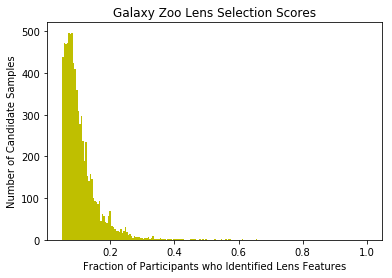

In [15]:
# Histogram of Lens Scores
plt.xlabel("Fraction of Participants who Identified Lens Features")
plt.ylabel("Number of Candidate Samples")
plt.title("Galaxy Zoo Lens Selection Scores")
plt.hist(zoo_in_gama_found_lens.LENS_SCORE,range=[0.05,1],bins=200,color='y')

plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/Histogram_of_lens_scores.pdf')

## Plots of Regions G09, G12, and G15

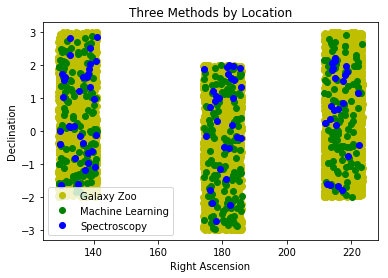

In [16]:
# Plot of three methods by location in three fields. Zoo data 
# is given for all objects that received score > 0
plt.plot(zoo_in_gama_found_lens.RA,zoo_in_gama_found_lens.DEC,'yo',label='Galaxy Zoo')
plt.plot(mac_in_gama.RA,mac_in_gama.DEC,'go',label='Machine Learning')
plt.plot(spec_in_gama.RA,spec_in_gama.DEC,'bo',label='Spectroscopy')

plt.xlabel("Right Ascension")
plt.ylabel("Declination")
plt.title("Three Methods by Location")
plt.legend(loc='best')

plt.show()

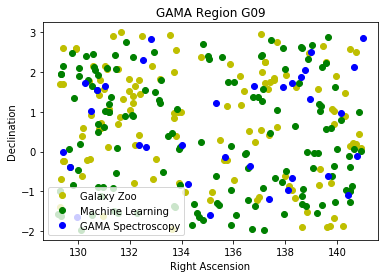

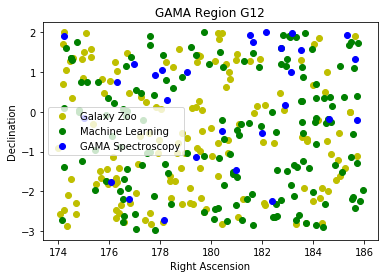

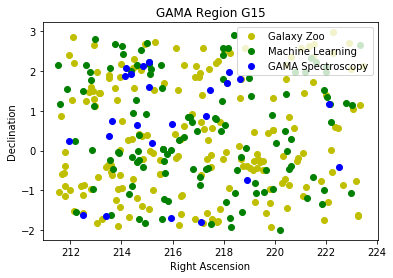

In [17]:
# Identifying the lenses found in GAMA Regions G09, G12, and G15 from

spec_in_G09 = spec[(spec.ra >= 129.0) & (spec.ra <= 141.0) & (spec.dec >= -2) & (spec.dec <= 3)]
spec_in_G12 = spec[(spec.ra >= 174.0) & (spec.ra <= 186.0) & (spec.dec >= -3) & (spec.dec <= 2)]                   
spec_in_G15 = spec[(spec.ra >= 211.5) & (spec.ra <= 223.5) & (spec.dec >= -2) & (spec.dec <= 3)]

mac_in_G09 = mac[(mac.RA >= 129.0) & (mac.RA <= 141.0) & (mac.DEC >= -2) & (mac.DEC <= 3)]
mac_in_G12 = mac[(mac.RA >= 174.0) & (mac.RA <= 186.0) & (mac.DEC >= -3) & (mac.DEC <= 2)]
mac_in_G15 = mac[(mac.RA >= 211.5) & (mac.RA <= 223.5) & (mac.DEC >= -2) & (mac.DEC <= 3)]

zoo_20_in_G09 = zoo_20[(zoo_20.RA >= 129.0) & (zoo_20.RA <= 141.0) & (zoo_20.DEC >= -2) & (zoo_20.DEC <= 3)]
zoo_20_in_G12 = zoo_20[(zoo_20.RA >= 174.0) & (zoo_20.RA <= 186.0) & (zoo_20.DEC >= -3) & (zoo_20.DEC <= 2)]
zoo_20_in_G15 = zoo_20[(zoo_20.RA >= 211.5) & (zoo_20.RA <= 223.5) & (zoo_20.DEC >= -2) & (zoo_20.DEC <= 3)]


# Plots of individual GAMA regions G09, G12, and G15 to show the distribution.
# Plot of G09.
plt.plot(zoo_20_in_G09.RA,zoo_20_in_G09.DEC,'yo',label='Galaxy Zoo')
plt.plot(mac_in_G09.RA,mac_in_G09.DEC,'go',label='Machine Learning')
plt.plot(spec_in_G09.ra,spec_in_G09.dec,'bo',label='GAMA Spectroscopy')

plt.xlabel("Right Ascension")
plt.ylabel("Declination")
plt.title("GAMA Region G09")
plt.legend(loc='best')
plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/Candidates_in_G09.pdf')

plt.show()

# Plot of G12.
plt.plot(zoo_20_in_G12.RA,zoo_20_in_G12.DEC,'yo',label='Galaxy Zoo')
plt.plot(mac_in_G12.RA,mac_in_G12.DEC,'go',label='Machine Learning')
plt.plot(spec_in_G12.ra,spec_in_G12.dec,'bo',label='GAMA Spectroscopy')

plt.xlabel("Right Ascension")
plt.ylabel("Declination")
plt.title("GAMA Region G12")
plt.legend(loc='best')
plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/Candidates_in_G12.pdf')

plt.show()

# Plot of G15.
plt.plot(zoo_20_in_G15.RA,zoo_20_in_G15.DEC,'yo',label='Galaxy Zoo')
plt.plot(mac_in_G15.RA,mac_in_G15.DEC,'go',label='Machine Learning')
plt.plot(spec_in_G15.ra,spec_in_G15.dec,'bo',label='GAMA Spectroscopy')

plt.xlabel("Right Ascension")
plt.ylabel("Declination")
plt.title("GAMA Region G15")
plt.legend(loc='best')
plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/Candidates_in_G15.pdf')

plt.show()

## Matching Overlap Between Method Datasets

In [18]:
# Found 4 matches between Mac and Spec
mac_and_spec_matches

,Unnamed: 0,GAMA_ID,ID,RA,DEC,MAC_SCORE
0,78,202448,1129.0,129.69546,-0.38179,4.0
1,79,323200,3430.0,130.73717,1.55957,4.0
2,278,220682,1618.0,182.74350,1.59787,4.0
3,368,342308,501.0,215.06900,2.22422,4.0


In [19]:
# Found 11 matches between Mac and Zoo (1 duplicate)
mac_and_zoo_matches

,Unnamed: 0,GAMA_ID,ID,RA,DEC,MAC_SCORE,ZOO_SCORE
0,124,517068,3063.0,130.59385,2.46237,4.0,0.137209
1,151,165409,3098.0,181.19655,-2.72003,38.0,0.059543
2,158,124486,2553.0,179.72998,-2.51919,28.0,0.426190
3,166,165871,2803.0,183.70237,-2.78805,18.0,0.282701
4,168,164145,2805.0,176.55308,-2.77562,16.0,0.092265
5,170,271500,2496.0,174.51145,1.34984,16.0,0.139357
6,293,271500,375.0,174.51145,1.34984,4.0,0.139357
7,300,136604,1642.0,175.87349,-1.74167,58.0,0.316451
8,389,618600,613.0,216.26346,0.26191,4.0,0.011410
9,393,106569,1524.0,216.66542,0.84988,4.0,0.178933


In [20]:
# Found 1 match between Spec and Zoo
spec_and_zoo_matches

,Unnamed: 0,GAMA_ID,RA,DEC,ZOO_SCORE
0,79,460463,212.48058,-1.61746,0.139206


## Plots of Stellar Mass to Redshift

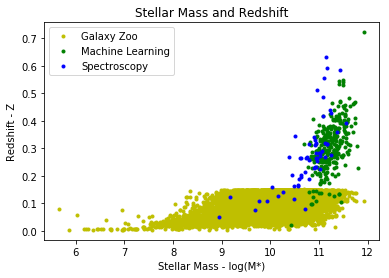

In [21]:
# Plot of Z to Stellar Mass using Zoo with Lens Score > 0.
plt.plot(np.log10(zoo_lens_with_mass.STELLAR_MASS), zoo_lens_with_mass.Z,'y.',label='Galaxy Zoo')
plt.plot(np.log10(mac_with_mass.STELLAR_MASS), mac_with_mass.Z, 'g.',label='Machine Learning')
plt.plot(np.log10(spec_with_mass.STELLAR_MASS), spec_with_mass.Z, 'b.',label='Spectroscopy')

plt.xlabel("Stellar Mass - log(M*)")
plt.ylabel("Redshift - Z")
plt.title("Stellar Mass and Redshift")
plt.legend(loc='best')

plt.show()

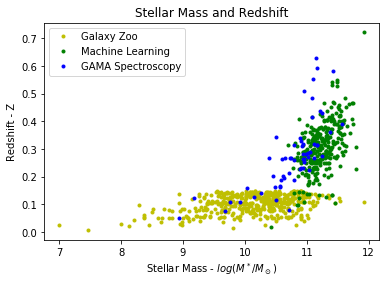

In [92]:
# Same plot as above, using Zoo with Lens Score above 20%
plt.plot(np.log10(zoo_lens20_with_mass.STELLAR_MASS), zoo_lens20_with_mass.Z, 'y.',label='Galaxy Zoo')
plt.plot(np.log10(mac_with_mass.STELLAR_MASS), mac_with_mass.Z, 'g.',label='Machine Learning')
plt.plot(np.log10(spec_with_mass.STELLAR_MASS), spec_with_mass.Z, 'b.',label='GAMA Spectroscopy')

plt.xlabel(r"Stellar Mass - $log(M^*/M_\odot)$")
plt.ylabel("Redshift - Z")
plt.title("Stellar Mass and Redshift")
plt.legend(loc='best')
plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/Stellar_mass_to_redshift_plot.pdf')

plt.show()

#### Conclustions:
- Spectroscopy tends to span a fairly wide redshift range (most in 0.2-0.3 range) while favoring high-mass (10.5-11.5) galaxies.
- Machine Learning seems even more biased toward redshifts above 0.2 and masses around 11 and above.
- Galaxy Zoo has cutoff at 1.5 z and a much wider range of mass, with a significant number below 10 and several below 9 and as low as 7.

## Misc Ideas and Plots

### 6/11/19 Zoo Score Dependency on Mass and Redshift?
Looking for correlation between mass, redshift and score in Galaxy Zoo, using all Zoo objects with a score > 0.

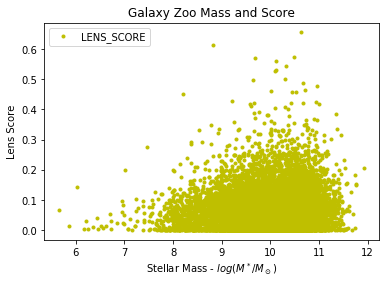

In [22]:
plt.plot(np.log10(zoo_lens_with_mass.STELLAR_MASS), zoo_lens_with_mass.LENS_SCORE, 'y.')

plt.xlabel(r"Stellar Mass - $log(M^*/M_\odot)$")
plt.ylabel("Lens Score")
plt.title("Galaxy Zoo Mass and Score")
plt.legend(loc='best')

plt.show()

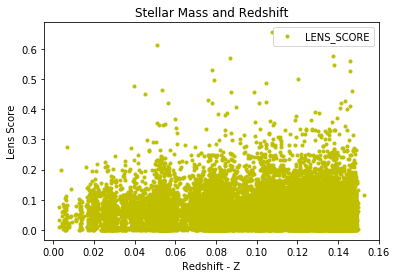

In [23]:
plt.plot(zoo_lens_with_mass.Z, zoo_lens_with_mass.LENS_SCORE, 'y.')

plt.xlabel("Redshift - Z")
plt.ylabel("Lens Score")
plt.title("Stellar Mass and Redshift")
plt.legend(loc='best')

plt.show()

(array([   9.,    9.,   30.,   61.,  134.,  212.,  265.,  443.,  731.,
        1076., 1263., 1501., 1781., 1964., 1740., 1107.,  424.,  122.,
          20.,    3.]),
 array([ 7.  ,  7.25,  7.5 ,  7.75,  8.  ,  8.25,  8.5 ,  8.75,  9.  ,
         9.25,  9.5 ,  9.75, 10.  , 10.25, 10.5 , 10.75, 11.  , 11.25,
        11.5 , 11.75, 12.  ]),
 <a list of 20 Patch objects>)

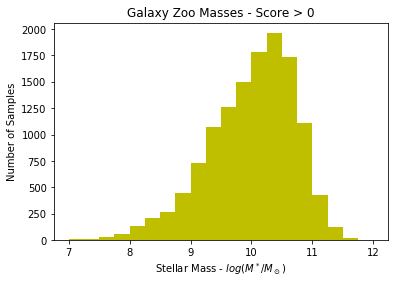

In [24]:
# Histogram of Masses
plt.xlabel(r"Stellar Mass - $log(M^*/M_\odot)$")
plt.ylabel("Number of Samples")
plt.title("Galaxy Zoo Masses - Score > 0")
plt.hist(np.log10(zoo_lens_with_mass.STELLAR_MASS),range=[7,12],bins=20,color='y')

(array([ 1.,  1.,  0.,  0.,  3.,  6.,  5., 12., 13., 29., 49., 46., 74.,
        76., 71., 53., 16.,  4.,  2.,  1.]),
 array([ 7.  ,  7.25,  7.5 ,  7.75,  8.  ,  8.25,  8.5 ,  8.75,  9.  ,
         9.25,  9.5 ,  9.75, 10.  , 10.25, 10.5 , 10.75, 11.  , 11.25,
        11.5 , 11.75, 12.  ]),
 <a list of 20 Patch objects>)

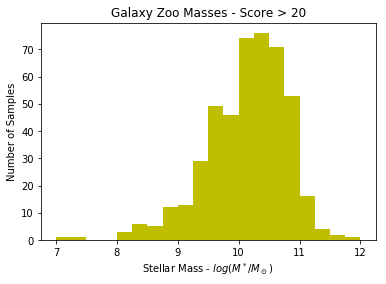

In [25]:
# Histogram of Masses
plt.xlabel(r"Stellar Mass - $log(M^*/M_\odot)$")
plt.ylabel("Number of Samples")
plt.title("Galaxy Zoo Masses - Score > 20")
plt.hist(np.log10(zoo_lens20_with_mass.STELLAR_MASS),range=[7,12],bins=20,color='y')

(array([  45.,   45.,  201.,  338.,  201.,  251.,  451.,  755.,  207.,
         534., 1110.,  723.,  590.,  834., 1073.,  884., 1158., 1221.,
        1408.,  887.]),
 array([0.    , 0.0075, 0.015 , 0.0225, 0.03  , 0.0375, 0.045 , 0.0525,
        0.06  , 0.0675, 0.075 , 0.0825, 0.09  , 0.0975, 0.105 , 0.1125,
        0.12  , 0.1275, 0.135 , 0.1425, 0.15  ]),
 <a list of 20 Patch objects>)

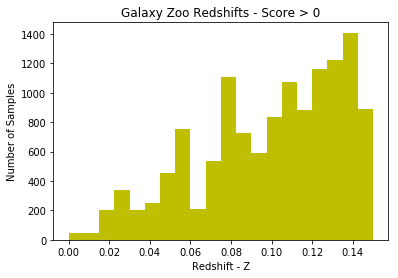

In [26]:
plt.xlabel("Redshift - Z")
plt.ylabel("Number of Samples")
plt.title("Galaxy Zoo Redshifts - Score > 0")
plt.hist(zoo_lens_with_mass.Z,range=[0,0.15],bins=20,color='y')

(array([ 1.,  0.,  2.,  6.,  3.,  6., 17., 31.,  9., 14., 36., 31., 18.,
        43., 48., 23., 34., 47., 59., 34.]),
 array([0.    , 0.0075, 0.015 , 0.0225, 0.03  , 0.0375, 0.045 , 0.0525,
        0.06  , 0.0675, 0.075 , 0.0825, 0.09  , 0.0975, 0.105 , 0.1125,
        0.12  , 0.1275, 0.135 , 0.1425, 0.15  ]),
 <a list of 20 Patch objects>)

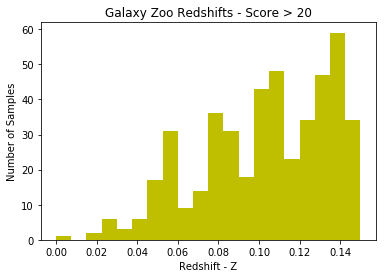

In [27]:
plt.xlabel("Redshift - Z")
plt.ylabel("Number of Samples")
plt.title("Galaxy Zoo Redshifts - Score > 20")
plt.hist(zoo_lens20_with_mass.Z,range=[0,0.15],bins=20,color='y')

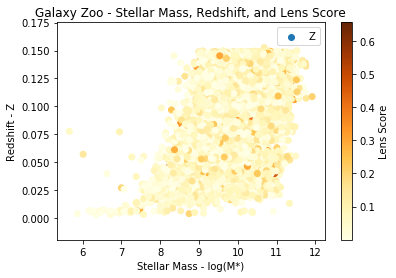

In [28]:
p = plt.scatter(np.log10(zoo_lens_with_mass.STELLAR_MASS), zoo_lens_with_mass.Z, c = zoo_lens_with_mass.LENS_SCORE, cmap = "YlOrBr")
plt.cbar = plt.colorbar(p, shrink=1, orientation='vertical') #, anchor=(0,1.5))
plt.cbar.set_label('Lens Score', fontsize=10)
plt.xlabel("Stellar Mass - log(M*)")
plt.ylabel("Redshift - Z")
plt.title("Galaxy Zoo - Stellar Mass, Redshift, and Lens Score")
plt.legend(loc='best')

plt.show()

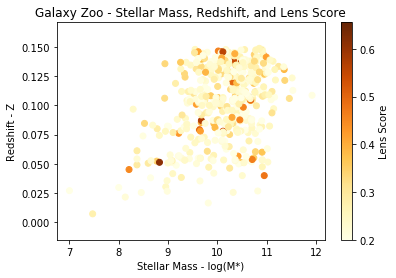

In [34]:
p = plt.scatter(np.log10(zoo_lens20_with_mass.STELLAR_MASS), zoo_lens20_with_mass.Z, c = zoo_lens20_with_mass.LENS_SCORE, cmap = "YlOrBr")
plt.cbar = plt.colorbar(p, shrink=1, orientation='vertical') #, anchor=(0,1.5))
plt.cbar.set_label('Lens Score', fontsize=10)
plt.xlabel("Stellar Mass - log(M*)")
plt.ylabel("Redshift - Z")
plt.title("Galaxy Zoo - Stellar Mass, Redshift, and Lens Score")
plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/Zoo_stellar_mass_redshift_lenscore_above20.pdf')

plt.show()

#### Conclusions:
- Scores seem to peak around 10.5 solar masses, which can also be seen in the number of samples at the same mass.
- Scores are relatively evenly distributed across the narrow reshift range.

### 6/11/19 Machine Learning Score Dependency on Mass and Redshift
Looking for correlation between mass, redshift and score in Mac.

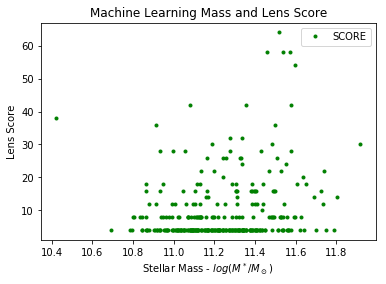

In [30]:
plt.plot(np.log10(mac_with_mass.STELLAR_MASS), mac_with_mass.SCORE, 'g.')

plt.xlabel(r"Stellar Mass - $log(M^*/M_\odot)$")
plt.ylabel("Lens Score")
plt.title("Machine Learning Mass and Lens Score")
plt.legend(loc='best')

plt.show()

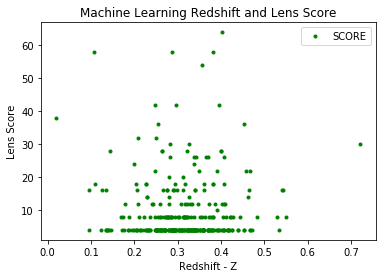

In [31]:
plt.plot(mac_with_mass.Z, mac_with_mass.SCORE, 'g.')

plt.xlabel("Redshift - Z")
plt.ylabel("Lens Score")
plt.title("Machine Learning Redshift and Lens Score")
plt.legend(loc='best')

plt.show()

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   1.,  44., 115., 100.,  40.,   3.]),
 array([ 7.  ,  7.25,  7.5 ,  7.75,  8.  ,  8.25,  8.5 ,  8.75,  9.  ,
         9.25,  9.5 ,  9.75, 10.  , 10.25, 10.5 , 10.75, 11.  , 11.25,
        11.5 , 11.75, 12.  ]),
 <a list of 20 Patch objects>)

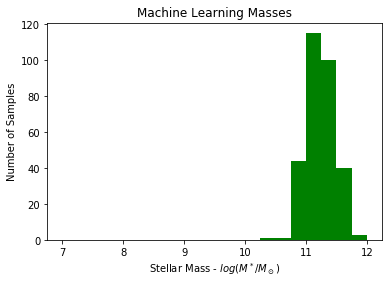

In [32]:
# Histogram of Masses
plt.xlabel(r"Stellar Mass - $log(M^*/M_\odot)$")
plt.ylabel("Number of Samples")
plt.title("Machine Learning Masses")
plt.hist(np.log10(mac_with_mass.STELLAR_MASS),range=[7,12],bins=20,color='g')

(array([ 1.,  0.,  4., 10., 11., 25., 50., 62., 63., 33., 27., 11.,  1.,
         5.,  0.,  0.,  0.,  0.,  1.,  0.]),
 array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
        0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 ]),
 <a list of 20 Patch objects>)

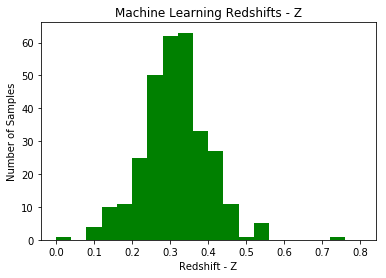

In [33]:
plt.xlabel("Redshift - Z")
plt.ylabel("Number of Samples")
plt.title("Machine Learning Redshifts - Z")
plt.hist(mac_with_mass.Z,range=[0,0.8],bins=20,color='g')

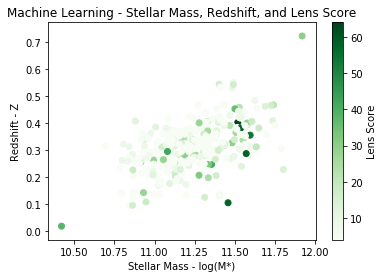

In [35]:
p = plt.scatter(np.log10(mac_with_mass.STELLAR_MASS), mac_with_mass.Z, c = mac_with_mass.SCORE, cmap = "Greens")
plt.cbar = plt.colorbar(p, shrink=1, orientation='vertical') #, anchor=(0,1.5))
plt.cbar.set_label('Lens Score', fontsize=10)
plt.xlabel("Stellar Mass - log(M*)")
plt.ylabel("Redshift - Z")
plt.title("Machine Learning - Stellar Mass, Redshift, and Lens Score")
plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/Mac_stellar_mass_redshift_lens_score.pdf')

plt.show()

#### Conclustions:
- Difficult to glean much from scores.
- Catalog peak at around 11 solar masses.
- Catalog seems to peak around 0.3 redshift as well.
- Plot of all three together seems to show peak in scores around 11.5 solar masses, which are actually the small group that appear in the upper extremes of the score plot on its own.

### 6/11/19 Spec Mass and Z Distribution

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  2.,  2.,
         5., 12., 16., 16.,  2.,  1.,  0.]),
 array([ 7.  ,  7.25,  7.5 ,  7.75,  8.  ,  8.25,  8.5 ,  8.75,  9.  ,
         9.25,  9.5 ,  9.75, 10.  , 10.25, 10.5 , 10.75, 11.  , 11.25,
        11.5 , 11.75, 12.  ]),
 <a list of 20 Patch objects>)

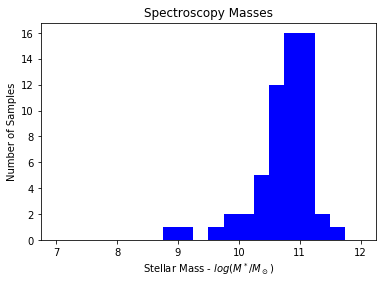

In [35]:
plt.xlabel(r"Stellar Mass - $log(M^*/M_\odot)$")
plt.ylabel("Number of Samples")
plt.title("Spectroscopy Masses")
plt.hist(np.log10(spec_with_mass.STELLAR_MASS),range=[7,12],bins=20,color='b')

(array([ 0.,  3.,  3.,  4.,  6.,  7., 12., 10.,  3.,  2.,  3.,  0.,  2.,
         1.,  2.,  1.,  0.,  0.,  0.,  0.]),
 array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
        0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 ]),
 <a list of 20 Patch objects>)

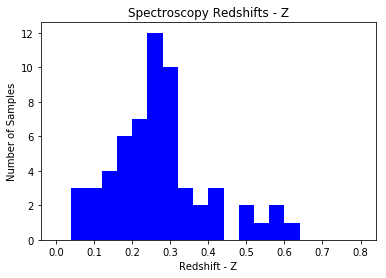

In [36]:
plt.xlabel("Redshift - Z")
plt.ylabel("Number of Samples")
plt.title("Spectroscopy Redshifts - Z")
plt.hist(spec_with_mass.Z,range=[0,0.8],bins=20,color='b')

#### Conclusions:
- Peaks in number of samples at mass ~ 11 and redshift ~ 0.25

### 6/11/19 Histograms Overplotted
Attempting to replot all on one histogram to compare.

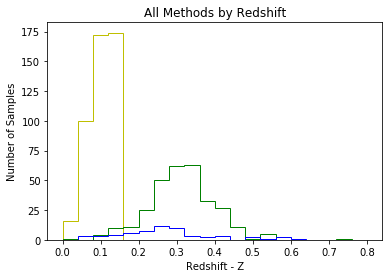

In [44]:
plt.xlabel("Redshift - Z")
plt.ylabel("Number of Samples")
plt.title("All Methods by Redshift")
plt.hist(zoo_lens20_with_mass.Z,range=[0,0.8],bins=20,color='y', histtype = 'step')
plt.hist(mac_with_mass.Z,range=[0,0.8],bins=20,color='g', histtype = 'step')
plt.hist(spec_with_mass.Z,range=[0,0.8],bins=20,color='b',  histtype = 'step')
plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/Histogram_redshift_all_methods.pdf')

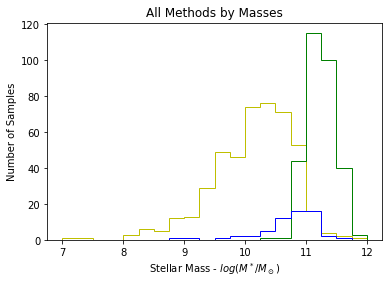

In [45]:
plt.xlabel(r"Stellar Mass - $log(M^*/M_\odot)$")
plt.ylabel("Number of Samples")
plt.title("All Methods by Masses")
plt.hist(np.log10(zoo_lens20_with_mass.STELLAR_MASS),range=[7,12],bins=20,color='y', histtype = 'step')
plt.hist(np.log10(mac_with_mass.STELLAR_MASS),range=[7,12],bins=20,color='g', histtype = 'step')
plt.hist(np.log10(spec_with_mass.STELLAR_MASS),range=[7,12],bins=20,color='b', histtype = 'step')
plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/Histogram_stellar_masses_all_methods.pdf')

In [51]:
# Opening GAMA data from G09, G12, and G15 (DR3)
hdul = fits.open('/home/shawn/Desktop/gravitational_lensing_research/FITS_Files/SpecAll.fits')  # open a FITS file
hdul.verify('fix')
gama = hdul[1].data  # assume the first extension is a table
print(gama.columns)

ColDefs(
    name = 'SPECID'; format = '33A'
    name = 'SURVEY'; format = '9A'
    name = 'SURVEY_CODE'; format = 'I'; null = -32768
    name = 'RA'; format = 'D'; unit = 'deg'
    name = 'DEC'; format = 'D'; unit = 'deg'
    name = 'WMIN'; format = 'E'; unit = 'A'
    name = 'WMAX'; format = 'D'; unit = 'A'
    name = 'Z'; format = 'E'
    name = 'NQ'; format = 'I'; null = -32768
    name = 'PROB'; format = 'E'
    name = 'FILENAME'; format = '67A'
    name = 'URL'; format = '88A'
    name = 'URL_IMG'; format = '92A'
    name = 'CATAID'; format = 'J'; null = -2147483648
    name = 'GAMA_NAME'; format = '23A'
    name = 'IC_FLAG'; format = 'I'; null = -32768
    name = 'DIST'; format = 'E'; unit = 'arcsec'
    name = 'IS_SBEST'; format = 'L'
    name = 'IS_BEST'; format = 'L'
)


## Searching for lenses whose source galaxies may have a measured spectrum in GAMA.

In [107]:
### 6/18 Looking for galaxies that may be identifiable as source galaxies using the Einstein radius equation.
zoo = zoo_lens_with_mass
zoo['DL'] = cosmo.luminosity_distance(zoo.Z) / 1000 # add column for distance to lens in GPC
zoo['SOURCE_GAMA_ID'] = pd.Series(0, index = range(len(zoo))) # add column for source GAMA_ID
zoo['SOURCE_Z'] = pd.Series(0, index = range(len(zoo))) # add column for source Z
zoo['EINSTEIN_RADIUS'] = pd.Series(0, index = range(len(zoo))) # add column for Einstein Radius


for i in range(len(zoo)):
    for j in range(len(gama)):
        r = np.sqrt(np.square(zoo.RA[i] - gama.RA[j]) + np.square(zoo.DEC[i] - gama.DEC[j])) # RA/DEC difference (potential Einstein Radius)
        thetaE1 = np.sqrt(zoo.STELLAR_MASS[i] / 10**11.09) * np.sqrt(zoo.DL[i] / 2) / 3600. # Lower limit on ER (/3600 to convert to degrees)
        thetaE1000 = np.sqrt(zoo.STELLAR_MASS[i] * 1000. / 10**11.09) * np.sqrt(zoo.DL[i] / 2.) / 3600. # Upper limit on ER (/3600 to convert to degrees)
        if r >= thetaE1 and r <= thetaE1000 and zoo.GAMA_ID[i] != gama.CATAID[j] and zoo.Z[i] > gama.Z[j]:
            zoo.SOURCE_GAMA_ID[i] = gama.CATAID[j]
            zoo.SOURCE_Z[i] = gama.Z[j]
            zoo.EINSTEIN_RADIUS[i] = r
            print('Ready to roll out!', i, zoo.GAMA_ID[i], zoo.SOURCE_GAMA_ID[i])
        elif j == 214623:
            print('You must construct additional pylons', i)

You must construct additional pylons 0
You must construct additional pylons 1
You must construct additional pylons 2
You must construct additional pylons 3
You must construct additional pylons 4
You must construct additional pylons 5
You must construct additional pylons 6
You must construct additional pylons 7
You must construct additional pylons 8
You must construct additional pylons 9
You must construct additional pylons 10
You must construct additional pylons 11
You must construct additional pylons 12
You must construct additional pylons 13
You must construct additional pylons 14
You must construct additional pylons 15
You must construct additional pylons 16
You must construct additional pylons 17
You must construct additional pylons 18
You must construct additional pylons 19
You must construct additional pylons 20
You must construct additional pylons 21
You must construct additional pylons 22
You must construct additional pylons 23
You must construct additional pylons 24
You must c

/home/shawn/miniconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/shawn/miniconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/shawn/miniconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Ready to roll out! 27 491595 491596
You must construct additional pylons 27
You must construct additional pylons 28
Ready to roll out! 29 463402 736164
You must construct additional pylons 29
You must construct additional pylons 30
You must construct additional pylons 31
You must construct additional pylons 32
You must construct additional pylons 33
You must construct additional pylons 34
You must construct additional pylons 35
You must construct additional pylons 36
You must construct additional pylons 37
You must construct additional pylons 38
You must construct additional pylons 39
You must construct additional pylons 40
You must construct additional pylons 41
You must construct additional pylons 42
You must construct additional pylons 43
You must construct additional pylons 44
You must construct additional pylons 45
You must construct additional pylons 46
You must construct additional pylons 47
You must construct additional pylons 48
You must construct additional pylons 49
You must

Ready to roll out! 215 512721 512722
You must construct additional pylons 215
You must construct additional pylons 216
You must construct additional pylons 217
You must construct additional pylons 218
You must construct additional pylons 219
You must construct additional pylons 220
You must construct additional pylons 221
You must construct additional pylons 222
You must construct additional pylons 223
You must construct additional pylons 224
You must construct additional pylons 225
You must construct additional pylons 226
You must construct additional pylons 227
You must construct additional pylons 228
You must construct additional pylons 229
You must construct additional pylons 230
You must construct additional pylons 231
Ready to roll out! 232 493248 880268
You must construct additional pylons 232
You must construct additional pylons 233
You must construct additional pylons 234
You must construct additional pylons 235
You must construct additional pylons 236
You must construct addit

You must construct additional pylons 406
You must construct additional pylons 407
You must construct additional pylons 408
You must construct additional pylons 409
You must construct additional pylons 410
You must construct additional pylons 411
You must construct additional pylons 412
You must construct additional pylons 413
You must construct additional pylons 414
You must construct additional pylons 415
You must construct additional pylons 416
You must construct additional pylons 417
You must construct additional pylons 418
You must construct additional pylons 419
You must construct additional pylons 420
You must construct additional pylons 421
You must construct additional pylons 422
You must construct additional pylons 423
You must construct additional pylons 424
You must construct additional pylons 425
You must construct additional pylons 426
You must construct additional pylons 427
Ready to roll out! 428 165217 165220
Ready to roll out! 428 165217 165218
You must construct addit

You must construct additional pylons 601
You must construct additional pylons 602
You must construct additional pylons 603
You must construct additional pylons 604
You must construct additional pylons 605
You must construct additional pylons 606
You must construct additional pylons 607
You must construct additional pylons 608
You must construct additional pylons 609
You must construct additional pylons 610
You must construct additional pylons 611
You must construct additional pylons 612
You must construct additional pylons 613
You must construct additional pylons 614
You must construct additional pylons 615
You must construct additional pylons 616
You must construct additional pylons 617
You must construct additional pylons 618
You must construct additional pylons 619
You must construct additional pylons 620
You must construct additional pylons 621
You must construct additional pylons 622
You must construct additional pylons 623
You must construct additional pylons 624
You must constru

You must construct additional pylons 797
You must construct additional pylons 798
You must construct additional pylons 799
You must construct additional pylons 800
You must construct additional pylons 801
You must construct additional pylons 802
You must construct additional pylons 803
You must construct additional pylons 804
You must construct additional pylons 805
You must construct additional pylons 806
You must construct additional pylons 807
You must construct additional pylons 808
You must construct additional pylons 809
You must construct additional pylons 810
You must construct additional pylons 811
You must construct additional pylons 812
You must construct additional pylons 813
You must construct additional pylons 814
You must construct additional pylons 815
You must construct additional pylons 816
You must construct additional pylons 817
You must construct additional pylons 818
You must construct additional pylons 819
You must construct additional pylons 820
You must constru

You must construct additional pylons 997
You must construct additional pylons 998
You must construct additional pylons 999
You must construct additional pylons 1000
You must construct additional pylons 1001
You must construct additional pylons 1002
You must construct additional pylons 1003
You must construct additional pylons 1004
You must construct additional pylons 1005
You must construct additional pylons 1006
You must construct additional pylons 1007
You must construct additional pylons 1008
You must construct additional pylons 1009
You must construct additional pylons 1010
You must construct additional pylons 1011
You must construct additional pylons 1012
You must construct additional pylons 1013
You must construct additional pylons 1014
You must construct additional pylons 1015
You must construct additional pylons 1016
You must construct additional pylons 1017
You must construct additional pylons 1018
You must construct additional pylons 1019
You must construct additional pylons 

You must construct additional pylons 1190
You must construct additional pylons 1191
You must construct additional pylons 1192
You must construct additional pylons 1193
You must construct additional pylons 1194
You must construct additional pylons 1195
You must construct additional pylons 1196
You must construct additional pylons 1197
You must construct additional pylons 1198
You must construct additional pylons 1199
You must construct additional pylons 1200
You must construct additional pylons 1201
You must construct additional pylons 1202
You must construct additional pylons 1203
You must construct additional pylons 1204
You must construct additional pylons 1205
You must construct additional pylons 1206
You must construct additional pylons 1207
You must construct additional pylons 1208
You must construct additional pylons 1209
You must construct additional pylons 1210
You must construct additional pylons 1211
You must construct additional pylons 1212
You must construct additional pylo

You must construct additional pylons 1385
You must construct additional pylons 1386
You must construct additional pylons 1387
You must construct additional pylons 1388
You must construct additional pylons 1389
You must construct additional pylons 1390
You must construct additional pylons 1391
You must construct additional pylons 1392
You must construct additional pylons 1393
You must construct additional pylons 1394
You must construct additional pylons 1395
You must construct additional pylons 1396
You must construct additional pylons 1397
You must construct additional pylons 1398
You must construct additional pylons 1399
You must construct additional pylons 1400
You must construct additional pylons 1401
You must construct additional pylons 1402
You must construct additional pylons 1403
You must construct additional pylons 1404
You must construct additional pylons 1405
You must construct additional pylons 1406
You must construct additional pylons 1407
You must construct additional pylo

You must construct additional pylons 1577
You must construct additional pylons 1578
You must construct additional pylons 1579
You must construct additional pylons 1580
You must construct additional pylons 1581
You must construct additional pylons 1582
You must construct additional pylons 1583
You must construct additional pylons 1584
You must construct additional pylons 1585
You must construct additional pylons 1586
You must construct additional pylons 1587
You must construct additional pylons 1588
You must construct additional pylons 1589
You must construct additional pylons 1590
You must construct additional pylons 1591
You must construct additional pylons 1592
You must construct additional pylons 1593
You must construct additional pylons 1594
You must construct additional pylons 1595
You must construct additional pylons 1596
You must construct additional pylons 1597
You must construct additional pylons 1598
You must construct additional pylons 1599
You must construct additional pylo

You must construct additional pylons 1772
You must construct additional pylons 1773
You must construct additional pylons 1774
You must construct additional pylons 1775
You must construct additional pylons 1776
You must construct additional pylons 1777
You must construct additional pylons 1778
You must construct additional pylons 1779
You must construct additional pylons 1780
You must construct additional pylons 1781
You must construct additional pylons 1782
You must construct additional pylons 1783
You must construct additional pylons 1784
You must construct additional pylons 1785
You must construct additional pylons 1786
You must construct additional pylons 1787
You must construct additional pylons 1788
You must construct additional pylons 1789
You must construct additional pylons 1790
You must construct additional pylons 1791
You must construct additional pylons 1792
You must construct additional pylons 1793
You must construct additional pylons 1794
You must construct additional pylo

You must construct additional pylons 1967
You must construct additional pylons 1968
You must construct additional pylons 1969
You must construct additional pylons 1970
You must construct additional pylons 1971
You must construct additional pylons 1972
You must construct additional pylons 1973
You must construct additional pylons 1974
You must construct additional pylons 1975
You must construct additional pylons 1976
You must construct additional pylons 1977
You must construct additional pylons 1978
You must construct additional pylons 1979
You must construct additional pylons 1980
You must construct additional pylons 1981
You must construct additional pylons 1982
You must construct additional pylons 1983
You must construct additional pylons 1984
You must construct additional pylons 1985
You must construct additional pylons 1986
You must construct additional pylons 1987
You must construct additional pylons 1988
You must construct additional pylons 1989
Ready to roll out! 1990 31410 6900

You must construct additional pylons 2154
You must construct additional pylons 2155
You must construct additional pylons 2156
You must construct additional pylons 2157
You must construct additional pylons 2158
You must construct additional pylons 2159
You must construct additional pylons 2160
You must construct additional pylons 2161
You must construct additional pylons 2162
You must construct additional pylons 2163
You must construct additional pylons 2164
You must construct additional pylons 2165
You must construct additional pylons 2166
You must construct additional pylons 2167
You must construct additional pylons 2168
You must construct additional pylons 2169
You must construct additional pylons 2170
You must construct additional pylons 2171
You must construct additional pylons 2172
You must construct additional pylons 2173
You must construct additional pylons 2174
You must construct additional pylons 2175
You must construct additional pylons 2176
You must construct additional pylo

You must construct additional pylons 2350
You must construct additional pylons 2351
You must construct additional pylons 2352
You must construct additional pylons 2353
You must construct additional pylons 2354
You must construct additional pylons 2355
Ready to roll out! 2356 164970 164969
Ready to roll out! 2356 164970 164972
You must construct additional pylons 2356
You must construct additional pylons 2357
You must construct additional pylons 2358
You must construct additional pylons 2359
You must construct additional pylons 2360
You must construct additional pylons 2361
You must construct additional pylons 2362
You must construct additional pylons 2363
You must construct additional pylons 2364
You must construct additional pylons 2365
You must construct additional pylons 2366
You must construct additional pylons 2367
You must construct additional pylons 2368
You must construct additional pylons 2369
You must construct additional pylons 2370
You must construct additional pylons 2371


You must construct additional pylons 2542
You must construct additional pylons 2543
You must construct additional pylons 2544
You must construct additional pylons 2545
You must construct additional pylons 2546
You must construct additional pylons 2547
You must construct additional pylons 2548
You must construct additional pylons 2549
You must construct additional pylons 2550
You must construct additional pylons 2551
You must construct additional pylons 2552
You must construct additional pylons 2553
You must construct additional pylons 2554
You must construct additional pylons 2555
You must construct additional pylons 2556
You must construct additional pylons 2557
You must construct additional pylons 2558
You must construct additional pylons 2559
You must construct additional pylons 2560
You must construct additional pylons 2561
You must construct additional pylons 2562
You must construct additional pylons 2563
You must construct additional pylons 2564
You must construct additional pylo

You must construct additional pylons 2738
You must construct additional pylons 2739
You must construct additional pylons 2740
You must construct additional pylons 2741
You must construct additional pylons 2742
You must construct additional pylons 2743
You must construct additional pylons 2744
You must construct additional pylons 2745
You must construct additional pylons 2746
You must construct additional pylons 2747
You must construct additional pylons 2748
You must construct additional pylons 2749
You must construct additional pylons 2750
You must construct additional pylons 2751
You must construct additional pylons 2752
You must construct additional pylons 2753
You must construct additional pylons 2754
You must construct additional pylons 2755
You must construct additional pylons 2756
You must construct additional pylons 2757
You must construct additional pylons 2758
You must construct additional pylons 2759
You must construct additional pylons 2760
You must construct additional pylo

You must construct additional pylons 2932
You must construct additional pylons 2933
You must construct additional pylons 2934
You must construct additional pylons 2935
You must construct additional pylons 2936
You must construct additional pylons 2937
You must construct additional pylons 2938
You must construct additional pylons 2939
You must construct additional pylons 2940
You must construct additional pylons 2941
You must construct additional pylons 2942
You must construct additional pylons 2943
You must construct additional pylons 2944
You must construct additional pylons 2945
You must construct additional pylons 2946
You must construct additional pylons 2947
You must construct additional pylons 2948
You must construct additional pylons 2949
You must construct additional pylons 2950
You must construct additional pylons 2951
You must construct additional pylons 2952
You must construct additional pylons 2953
Ready to roll out! 2954 62402 62403
You must construct additional pylons 295

You must construct additional pylons 3123
You must construct additional pylons 3124
You must construct additional pylons 3125
You must construct additional pylons 3126
Ready to roll out! 3127 15690 15694
Ready to roll out! 3127 15690 15692
You must construct additional pylons 3127
You must construct additional pylons 3128
You must construct additional pylons 3129
You must construct additional pylons 3130
You must construct additional pylons 3131
You must construct additional pylons 3132
Ready to roll out! 3133 92463 695847
You must construct additional pylons 3133
You must construct additional pylons 3134
You must construct additional pylons 3135
You must construct additional pylons 3136
You must construct additional pylons 3137
You must construct additional pylons 3138
You must construct additional pylons 3139
You must construct additional pylons 3140
You must construct additional pylons 3141
You must construct additional pylons 3142
You must construct additional pylons 3143
You must 

You must construct additional pylons 3309
You must construct additional pylons 3310
You must construct additional pylons 3311
You must construct additional pylons 3312
You must construct additional pylons 3313
You must construct additional pylons 3314
You must construct additional pylons 3315
You must construct additional pylons 3316
You must construct additional pylons 3317
You must construct additional pylons 3318
You must construct additional pylons 3319
You must construct additional pylons 3320
You must construct additional pylons 3321
You must construct additional pylons 3322
You must construct additional pylons 3323
You must construct additional pylons 3324
You must construct additional pylons 3325
You must construct additional pylons 3326
You must construct additional pylons 3327
You must construct additional pylons 3328
You must construct additional pylons 3329
You must construct additional pylons 3330
You must construct additional pylons 3331
You must construct additional pylo

You must construct additional pylons 3496
You must construct additional pylons 3497
You must construct additional pylons 3498
You must construct additional pylons 3499
You must construct additional pylons 3500
You must construct additional pylons 3501
You must construct additional pylons 3502
You must construct additional pylons 3503
You must construct additional pylons 3504
You must construct additional pylons 3505
You must construct additional pylons 3506
You must construct additional pylons 3507
You must construct additional pylons 3508
You must construct additional pylons 3509
You must construct additional pylons 3510
You must construct additional pylons 3511
You must construct additional pylons 3512
You must construct additional pylons 3513
You must construct additional pylons 3514
You must construct additional pylons 3515
You must construct additional pylons 3516
You must construct additional pylons 3517
You must construct additional pylons 3518
You must construct additional pylo

You must construct additional pylons 3682
You must construct additional pylons 3683
You must construct additional pylons 3684
You must construct additional pylons 3685
You must construct additional pylons 3686
You must construct additional pylons 3687
You must construct additional pylons 3688
You must construct additional pylons 3689
You must construct additional pylons 3690
You must construct additional pylons 3691
You must construct additional pylons 3692
You must construct additional pylons 3693
You must construct additional pylons 3694
You must construct additional pylons 3695
You must construct additional pylons 3696
You must construct additional pylons 3697
You must construct additional pylons 3698
You must construct additional pylons 3699
You must construct additional pylons 3700
You must construct additional pylons 3701
You must construct additional pylons 3702
You must construct additional pylons 3703
You must construct additional pylons 3704
You must construct additional pylo

You must construct additional pylons 3869
You must construct additional pylons 3870
You must construct additional pylons 3871
You must construct additional pylons 3872
You must construct additional pylons 3873
You must construct additional pylons 3874
You must construct additional pylons 3875
You must construct additional pylons 3876
You must construct additional pylons 3877
Ready to roll out! 3878 545407 545408
You must construct additional pylons 3878
You must construct additional pylons 3879
You must construct additional pylons 3880
You must construct additional pylons 3881
You must construct additional pylons 3882
You must construct additional pylons 3883
You must construct additional pylons 3884
You must construct additional pylons 3885
You must construct additional pylons 3886
You must construct additional pylons 3887
You must construct additional pylons 3888
You must construct additional pylons 3889
You must construct additional pylons 3890
You must construct additional pylons 3

You must construct additional pylons 4053
You must construct additional pylons 4054
You must construct additional pylons 4055
You must construct additional pylons 4056
You must construct additional pylons 4057
You must construct additional pylons 4058
You must construct additional pylons 4059
You must construct additional pylons 4060
You must construct additional pylons 4061
You must construct additional pylons 4062
You must construct additional pylons 4063
You must construct additional pylons 4064
You must construct additional pylons 4065
You must construct additional pylons 4066
You must construct additional pylons 4067
You must construct additional pylons 4068
You must construct additional pylons 4069
You must construct additional pylons 4070
You must construct additional pylons 4071
You must construct additional pylons 4072
You must construct additional pylons 4073
You must construct additional pylons 4074
You must construct additional pylons 4075
You must construct additional pylo

You must construct additional pylons 4226
You must construct additional pylons 4227
You must construct additional pylons 4228
You must construct additional pylons 4229
You must construct additional pylons 4230
You must construct additional pylons 4231
You must construct additional pylons 4232
You must construct additional pylons 4233
You must construct additional pylons 4234
You must construct additional pylons 4235
You must construct additional pylons 4236
You must construct additional pylons 4237
You must construct additional pylons 4238
You must construct additional pylons 4239
You must construct additional pylons 4240
You must construct additional pylons 4241
You must construct additional pylons 4242
You must construct additional pylons 4243
You must construct additional pylons 4244
You must construct additional pylons 4245
You must construct additional pylons 4246
You must construct additional pylons 4247
You must construct additional pylons 4248
You must construct additional pylo

Ready to roll out! 4404 163707 163706
You must construct additional pylons 4404
You must construct additional pylons 4405
You must construct additional pylons 4406
You must construct additional pylons 4407
You must construct additional pylons 4408
You must construct additional pylons 4409
You must construct additional pylons 4410
You must construct additional pylons 4411
You must construct additional pylons 4412
You must construct additional pylons 4413
Ready to roll out! 4414 136604 136608
Ready to roll out! 4414 136604 136615
You must construct additional pylons 4414
You must construct additional pylons 4415
You must construct additional pylons 4416
Ready to roll out! 4417 170915 170917
You must construct additional pylons 4417
You must construct additional pylons 4418
You must construct additional pylons 4419
You must construct additional pylons 4420
You must construct additional pylons 4421
You must construct additional pylons 4422
You must construct additional pylons 4423
Ready to

You must construct additional pylons 4586
You must construct additional pylons 4587
You must construct additional pylons 4588
You must construct additional pylons 4589
You must construct additional pylons 4590
You must construct additional pylons 4591
You must construct additional pylons 4592
You must construct additional pylons 4593
You must construct additional pylons 4594
You must construct additional pylons 4595
You must construct additional pylons 4596
You must construct additional pylons 4597
You must construct additional pylons 4598
You must construct additional pylons 4599
You must construct additional pylons 4600
You must construct additional pylons 4601
You must construct additional pylons 4602
You must construct additional pylons 4603
You must construct additional pylons 4604
You must construct additional pylons 4605
You must construct additional pylons 4606
You must construct additional pylons 4607
You must construct additional pylons 4608
You must construct additional pylo

You must construct additional pylons 4780
You must construct additional pylons 4781
You must construct additional pylons 4782
You must construct additional pylons 4783
You must construct additional pylons 4784
You must construct additional pylons 4785
You must construct additional pylons 4786
You must construct additional pylons 4787
You must construct additional pylons 4788
You must construct additional pylons 4789
You must construct additional pylons 4790
Ready to roll out! 4791 622475 622476
You must construct additional pylons 4791
You must construct additional pylons 4792
You must construct additional pylons 4793
You must construct additional pylons 4794
You must construct additional pylons 4795
You must construct additional pylons 4796
You must construct additional pylons 4797
You must construct additional pylons 4798
You must construct additional pylons 4799
You must construct additional pylons 4800
You must construct additional pylons 4801
You must construct additional pylons 4

You must construct additional pylons 4973
You must construct additional pylons 4974
You must construct additional pylons 4975
You must construct additional pylons 4976
You must construct additional pylons 4977
You must construct additional pylons 4978
You must construct additional pylons 4979
You must construct additional pylons 4980
You must construct additional pylons 4981
You must construct additional pylons 4982
You must construct additional pylons 4983
You must construct additional pylons 4984
You must construct additional pylons 4985
You must construct additional pylons 4986
You must construct additional pylons 4987
You must construct additional pylons 4988
You must construct additional pylons 4989
You must construct additional pylons 4990
You must construct additional pylons 4991
Ready to roll out! 4992 347397 347396
You must construct additional pylons 4992
You must construct additional pylons 4993
You must construct additional pylons 4994
You must construct additional pylons 4

You must construct additional pylons 5166
You must construct additional pylons 5167
You must construct additional pylons 5168
You must construct additional pylons 5169
You must construct additional pylons 5170
You must construct additional pylons 5171
You must construct additional pylons 5172
You must construct additional pylons 5173
You must construct additional pylons 5174
You must construct additional pylons 5175
You must construct additional pylons 5176
You must construct additional pylons 5177
You must construct additional pylons 5178
You must construct additional pylons 5179
You must construct additional pylons 5180
You must construct additional pylons 5181
You must construct additional pylons 5182
You must construct additional pylons 5183
You must construct additional pylons 5184
You must construct additional pylons 5185
Ready to roll out! 5186 271482 271485
You must construct additional pylons 5186
You must construct additional pylons 5187
You must construct additional pylons 5

You must construct additional pylons 5358
You must construct additional pylons 5359
You must construct additional pylons 5360
You must construct additional pylons 5361
You must construct additional pylons 5362
You must construct additional pylons 5363
You must construct additional pylons 5364
You must construct additional pylons 5365
You must construct additional pylons 5366
You must construct additional pylons 5367
You must construct additional pylons 5368
You must construct additional pylons 5369
You must construct additional pylons 5370
You must construct additional pylons 5371
You must construct additional pylons 5372
You must construct additional pylons 5373
You must construct additional pylons 5374
You must construct additional pylons 5375
You must construct additional pylons 5376
You must construct additional pylons 5377
You must construct additional pylons 5378
You must construct additional pylons 5379
You must construct additional pylons 5380
You must construct additional pylo

You must construct additional pylons 5551
You must construct additional pylons 5552
You must construct additional pylons 5553
You must construct additional pylons 5554
You must construct additional pylons 5555
You must construct additional pylons 5556
You must construct additional pylons 5557
You must construct additional pylons 5558
You must construct additional pylons 5559
You must construct additional pylons 5560
You must construct additional pylons 5561
You must construct additional pylons 5562
You must construct additional pylons 5563
You must construct additional pylons 5564
You must construct additional pylons 5565
You must construct additional pylons 5566
You must construct additional pylons 5567
Ready to roll out! 5568 239666 239667
Ready to roll out! 5568 239666 239668
You must construct additional pylons 5568
You must construct additional pylons 5569
You must construct additional pylons 5570
You must construct additional pylons 5571
You must construct additional pylons 5572


KeyboardInterrupt: 

In [102]:
zoo = zoo_lens_with_mass
zoo['DL'] = cosmo.luminosity_distance(zoo.Z) / 1000 # add column for distance to lens in GPC
zoo['SOURCE_GAMA_ID'] = pd.Series(0, index = range(len(zoo))) # add column for source GAMA_ID
zoo['SOURCE_Z'] = pd.Series(0, index = range(len(zoo))) # add column for source Z
zoo['EINSTEIN_RADIUS'] = pd.Series(0, index = range(len(zoo))) # add column for Einstein Radius

thetaE1000 = np.sqrt(zoo.STELLAR_MASS[0] * 1000 / 10**11.09) * np.sqrt(zoo.DL[0] / 2) # I think 1000 is too much.
print(thetaE1000) # Gave radius of 8 arcsecs... Need to divide by 3600 to get degrees!

8.00096783840953


[('1030358159811700736', 'SDSS',  1, 211.73487, -1.59471, 3815.93, 9206.62,  2.9190e-02, 5, 0., '/GAMA/dr3/data/spectra/sdss/spec-0915-52443-0581.fit', 'http://www.gama-survey.org/dr3/data/spectra/sdss/spec-0915-52443-0581.fit', 'http://www.gama-survey.org/dr3/data/spectra/sdss/png/spec-0915-52443-0581.png',  491457, 'GAMAJ140656.36-013541.0', 4104, 0.05,  1,  1)
 ('1030358434689607680', 'SDSS',  1, 211.51452, -1.65754, 3815.93, 9206.62,  5.4240e-02, 5, 0., '/GAMA/dr3/data/spectra/sdss/spec-0915-52443-0582.fit', 'http://www.gama-survey.org/dr3/data/spectra/sdss/spec-0915-52443-0582.fit', 'http://www.gama-survey.org/dr3/data/spectra/sdss/png/spec-0915-52443-0582.png',  460298, 'GAMAJ140603.48-013927.2', 4104, 0.14,  1,  1)
 ('1030358984445421568', 'SDSS',  1, 211.78462, -1.71899, 3815.93, 9206.62,  1.1341e-01, 5, 0., '/GAMA/dr3/data/spectra/sdss/spec-0915-52443-0584.fit', 'http://www.gama-survey.org/dr3/data/spectra/sdss/spec-0915-52443-0584.fit', 'http://www.gama-survey.org/dr3/data/sp

## Creating Three-Panel Plot with Mass to Z Scatter and Histograms

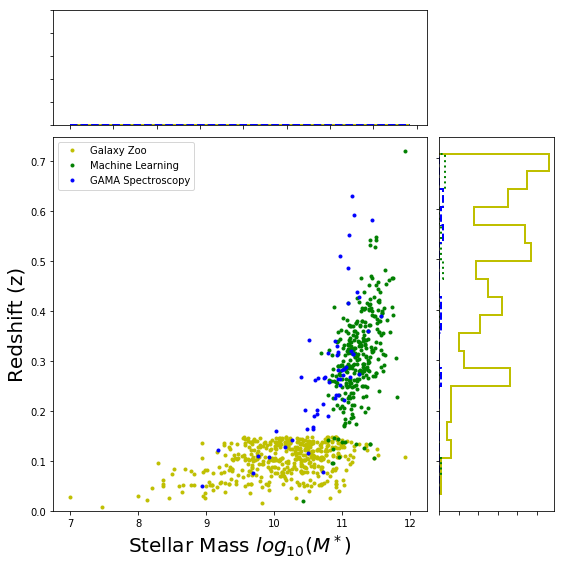

In [78]:
# Three-panel plot
from matplotlib.ticker import NullFormatter
nullfmt   = NullFormatter()         # no labels
# definitions for the axes
left, width = 0.1, 0.65
lower, height = 0.1, 0.65
lower_h = left_h = left+width+0.02
    
rect_scatter = [left, lower, width, height]
rect_histx = [left, lower_h, width, 0.2]
rect_histy = [left_h, lower, 0.2, height]
    
    # start with a rectangular Figure
plt.figure(1, figsize=(8,8))
    
axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)
    
    # no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)
    
axHistx.yaxis.set_major_formatter(nullfmt)
axHisty.xaxis.set_major_formatter(nullfmt)

# the scatter plots
axScatter.plot(np.log10(zoo_lens20_with_mass.STELLAR_MASS), zoo_lens20_with_mass.Z, 'y.',label='Galaxy Zoo')
axScatter.plot(np.log10(mac_with_mass.STELLAR_MASS), mac_with_mass.Z, 'g.',label='Machine Learning')
axScatter.plot(np.log10(spec_with_mass.STELLAR_MASS), spec_with_mass.Z, 'b.',label='GAMA Spectroscopy')
axScatter.legend(loc='upper left', numpoints=1)
    
    
# now determine nice limits by hand:
binwidth = 0.5
bins=20
xbins = np.arange(min(zoo_lens20_with_mass.STELLAR_MASS),max(zoo_lens20_with_mass.STELLAR_MASS), (max(zoo_lens20_with_mass.STELLAR_MASS)-min(zoo_lens20_with_mass.STELLAR_MASS))/bins)
ybins = np.arange(min(zoo_lens20_with_mass.Z),max(zoo_lens20_with_mass.Z), (max(zoo_lens20_with_mass.Z)-min(zoo_lens20_with_mass.Z))/bins)

axScatter.set_xlim((min(zoo_lens20_with_mass.STELLAR_MASS)-0.5, max(zoo_lens20_with_mass.STELLAR_MASS)+0.5))
axScatter.set_ylim((min(zoo_lens20_with_mass.Z)-0.05, max(zoo_lens20_with_mass.Z)+0.05))
axScatter.axis([6.75,12.25,0.,0.75], prop={'size':25})

axScatter.set_xlabel(r'Stellar Mass $log_{10}(M^*)$', fontsize=20)
axScatter.set_ylabel(r'Redshift (z)', fontsize=20)
    
#xbins = np.arange(8.5, 12.5, xbinwidth)
#ybins = np.arange(0., 0.6, ybinwidth)
    
axHisty.hist(zoo_lens20_with_mass.Z, orientation='horizontal', bins=ybins,color='y', histtype = 'step', linewidth=2)
axHisty.hist(mac_with_mass.Z, orientation='horizontal', bins=ybins,color='g', histtype = 'step', linewidth=2, linestyle='dotted')
axHisty.hist(spec_with_mass.Z, orientation='horizontal', bins=ybins,color='b',  histtype = 'step', linewidth=2, linestyle='dashed')
    
axHistx.hist(np.log10(zoo_lens20_with_mass.STELLAR_MASS), bins=xbins,color='y', histtype = 'step', linewidth=2)
axHistx.hist(np.log10(mac_with_mass.STELLAR_MASS), bins=xbins,color='g', histtype = 'step', linewidth=2, linestyle='dotted')
axHistx.hist(np.log10(spec_with_mass.STELLAR_MASS), bins=xbins,color='b', histtype = 'step', linewidth=2, linestyle='dashed')
    
#axHistx.set_xlim( axScatter.get_xlim() )
#axHisty.set_ylim( axScatter.get_ylim() )
#axHisty.set_xlabel(r'#', fontsize=20)
#axHistx.set_ylabel(r'#', fontsize=20)
    # Referee asks for tick marks at unity along y-axes
axHistx.set_yticks([0,10,20,30,40,50])
axHisty.set_xticks([0,10,20,30,40,50])

   # savefig('./LENSES_mass_z_threeplot.png')
    #savefig('./LENSES_mass_z_threeplot.pdf')

    #savefig('/Users/bholwerd/Desktop/Proposals/HST/C24/SNAP-GAMA-LENSES/Figures/LENSES_mass_z_threeplot.pdf')

## Analyzing the specific characteristics of overlap regions.

In [48]:
pd.merge(mac_and_spec_matches, spec_with_mass, on = 'GAMA_ID', how = 'left')

,Unnamed: 0_x,GAMA_ID,ID,RA_x,DEC_x,MAC_SCORE,Unnamed: 0_y,Unnamed: 0.1,RA_y,DEC_y,z1,z2,spec_type,STELLAR_MASS,Z
0,78,202448,1129.0,129.69546,-0.38179,4.0,1,1,129.69546,-0.38179,0.418,0.738,PG+ELG,NaN,NaN
1,79,323200,3430.0,130.73717,1.55957,4.0,9,9,130.73717,1.55957,0.416,0.350,PG+ELG,1.216000e+11,0.4158
2,278,220682,1618.0,182.74350,1.59787,4.0,45,45,182.74350,1.59787,0.289,0.361,PG+ELG,1.130000e+11,0.2889
3,368,342308,501.0,215.06900,2.22422,4.0,78,78,215.06900,2.22422,0.391,0.328,PG+ELG,3.661000e+11,0.3906


In [49]:
pd.merge(mac_and_zoo_matches, mac_with_mass, on = 'GAMA_ID', how = 'left')

,Unnamed: 0_x,GAMA_ID,ID_x,RA_x,DEC_x,MAC_SCORE,ZOO_SCORE,Unnamed: 0_y,Unnamed: 0.1,ID_y,RA_y,DEC_y,SCORE,STELLAR_MASS,Z
0,124,517068,3063.0,130.59385,2.46237,4.0,0.137209,124,124,3063.0,130.59390,2.46245,4.0,1.081000e+11,0.1378
1,151,165409,3098.0,181.19655,-2.72003,38.0,0.059543,151,151,3098.0,181.19672,-2.72009,38.0,2.641000e+10,0.0196
2,158,124486,2553.0,179.72998,-2.51919,28.0,0.426190,158,158,2553.0,179.73003,-2.51895,28.0,8.541000e+10,0.1435
3,166,165871,2803.0,183.70237,-2.78805,18.0,0.282701,166,166,2803.0,183.70247,-2.78789,18.0,8.850000e+10,0.1089
4,168,164145,2805.0,176.55308,-2.77562,16.0,0.092265,168,168,2805.0,176.55307,-2.77556,16.0,7.301000e+10,0.0966
5,170,271500,2496.0,174.51145,1.34984,16.0,0.139357,170,170,2496.0,174.51166,1.35002,16.0,2.540000e+11,0.1340
6,170,271500,2496.0,174.51145,1.34984,16.0,0.139357,293,293,375.0,174.51164,1.35002,4.0,2.540000e+11,0.1340
7,293,271500,375.0,174.51145,1.34984,4.0,0.139357,170,170,2496.0,174.51166,1.35002,16.0,2.540000e+11,0.1340
8,293,271500,375.0,174.51145,1.34984,4.0,0.139357,293,293,375.0,174.51164,1.35002,4.0,2.540000e+11,0.1340
9,300,136604,1642.0,175.87349,-1.74167,58.0,0.316451,300,300,1642.0,175.87355,-1.74164,58.0,2.866000e+11,0.1060


In [50]:
pd.merge(spec_and_zoo_matches, spec_with_mass, on = 'GAMA_ID', how = 'left')

,Unnamed: 0_x,GAMA_ID,RA_x,DEC_x,ZOO_SCORE,Unnamed: 0_y,Unnamed: 0.1,RA_y,DEC_y,z1,z2,spec_type,STELLAR_MASS,Z
0,79,460463,212.48058,-1.61746,0.139206,79,79,212.48058,-1.61746,0.115,0.411,PG+ELG,3.127000e+10,0.1153


In [5]:
zoo_in_gama

,Unnamed: 0,GAMA_ID,RA,DEC,LENS_SCORE
0,0,491457,211.73487,-1.59471,0.000000
1,1,460298,211.51452,-1.65754,0.000000
2,2,460345,211.78462,-1.71899,0.000000
3,3,484623,211.63878,-1.93563,0.000000
4,4,484637,211.79006,-1.89456,0.169778
5,5,491454,211.71473,-1.54075,0.000000
6,6,491414,211.50587,-1.53749,0.000000
7,7,484621,211.63321,-1.96885,0.061127
8,8,463119,211.54913,-1.22789,0.000000
9,9,463148,211.68703,-1.33978,0.143398


## Comparing Lens Fraction Score vs Other "Odd" Feature Selection Options

In [4]:
# Opening Galaxy Zoo data
hdul = fits.open('/home/shawn/Desktop/gravitational_lensing_research/FITS_Files/galaxy_zoo_gama_cleaned.fits')  # open a FITS file
hdul.verify('fix')
galaxyzoo = hdul[1].data  # assume the first extension is a table
print(galaxyzoo.columns)

# Creating new DataFrame of GAMA ID and all oddtype scores

survey_id = galaxyzoo.survey_id
survey_id_int = [int(survey_id) for survey_id in survey_id]
none = galaxyzoo.oddtype_none_frac
ring = galaxyzoo.oddtype_ring_frac
lens = galaxyzoo.oddtype_lens_or_arc_frac
irregular = galaxyzoo.oddtype_irregular_frac
other = galaxyzoo.oddtype_other_frac
dust_lane = galaxyzoo.oddtype_dust_lane_frac
overlapping = galaxyzoo.oddtype_overlapping_frac

galaxyzoo_oddtype_data = list(zip(survey_id_int, none, ring, lens, irregular, other, dust_lane, overlapping))

galaxyzoo_oddtype_scores = pd.DataFrame(galaxyzoo_oddtype_data, columns = ['GAMA_ID', 'NONE', 'RING', 'LENS', 'IRREGULAR', 'OTHER', 'DUST_LANE', 'OVERLAPPING'])

zoo_with_all_scores = pd.merge(zoo_lens_with_mass, galaxyzoo_oddtype_scores, how = 'outer', on = 'GAMA_ID')

zoo_with_all_scores

ColDefs(
    name = 'region'; format = '6A'
    name = 'subject_id'; format = '24A'
    name = 'survey_id'; format = '7A'
    name = 'zooniverse_id'; format = '10A'
    name = 'features_total'; format = 'D'
    name = 'edgeon_total'; format = 'D'
    name = 'bar_total'; format = 'D'
    name = 'spiral_total'; format = 'D'
    name = 'bulge_total'; format = 'D'
    name = 'spiralwinding_total'; format = 'D'
    name = 'spiralnumber_total'; format = 'D'
    name = 'bulgeshape_total'; format = 'D'
    name = 'round_total'; format = 'D'
    name = 'mergers_total'; format = 'D'
    name = 'oddtype_total'; format = 'D'
    name = 'discuss_total'; format = 'D'
    name = 'odd_total'; format = 'D'
    name = 'features_smooth_frac'; format = 'D'
    name = 'features_features_frac'; format = 'D'
    name = 'features_star_or_artifact_frac'; format = 'D'
    name = 'edgeon_yes_frac'; format = 'D'
    name = 'edgeon_no_frac'; format = 'D'
    name = 'bar_bar_frac'; format = 'D'
    name = 'bar_no_b

,Unnamed: 0,GAMA_ID,RA,DEC,LENS_SCORE,STELLAR_MASS,Z,NONE,RING,LENS,IRREGULAR,OTHER,DUST_LANE,OVERLAPPING
0,0.0,484637,211.79006,-1.89456,0.169778,3.489000e+10,0.1029,0.309289,0.127066,0.169778,0.025431,0.341320,0.027117,0.000000
1,1.0,484621,211.63321,-1.96885,0.061127,2.298000e+10,0.0351,0.283438,0.533179,0.061127,0.000000,0.061127,0.000000,0.061127
2,2.0,463148,211.68703,-1.33978,0.143398,9.270000e+09,0.0535,0.184961,0.234006,0.143398,0.000000,0.071699,0.007439,0.358496
3,3.0,543438,211.53734,-1.03689,0.213034,8.980000e+09,0.0701,0.782883,0.004083,0.213034,0.000000,0.000000,0.000000,0.000000
4,4.0,463145,211.63664,-1.23923,0.000755,5.946000e+09,0.1378,0.418729,0.000000,0.000755,0.000000,0.507433,0.000000,0.073082
5,5.0,460374,212.03548,-1.70230,0.024226,4.848000e+10,0.0250,0.304799,0.157897,0.024226,0.000000,0.000000,0.256539,0.256539
6,6.0,484655,211.88866,-1.97102,0.003699,1.321000e+10,0.0564,0.790692,0.195095,0.003699,0.003408,0.003408,0.000000,0.003699
7,7.0,460379,211.94664,-1.71637,0.110855,1.077000e+11,0.1136,0.889145,0.000000,0.110855,0.000000,0.000000,0.000000,0.000000
8,8.0,463176,211.81052,-1.19533,0.045798,5.776000e+09,0.0545,0.341453,0.337959,0.045798,0.045798,0.091597,0.137395,0.000000
9,9.0,463197,212.00002,-1.29196,0.093139,1.316000e+11,0.1164,0.093139,0.651157,0.093139,0.000000,0.031222,0.000000,0.131342


# Hard Zoo Cut
## Writing new cut to acquire our final Zoo catalogue where Lens score is higher than the other features' scores, higher than 3/4 the "None" score, and higher than 20%. 
Gives 88 candidates.

In [5]:
zoo_with_all_scores = zoo_with_all_scores.drop_duplicates()

zoo_hard_cut = zoo_with_all_scores[(zoo_with_all_scores.LENS >= 0.2) &
                                        (zoo_with_all_scores.LENS >= (3/4)*zoo_with_all_scores.NONE) &
                                          (zoo_with_all_scores.LENS >= zoo_with_all_scores.RING) &
                                          (zoo_with_all_scores.LENS >= zoo_with_all_scores.IRREGULAR) &
                                          (zoo_with_all_scores.LENS >= zoo_with_all_scores.OTHER) &
                                          (zoo_with_all_scores.LENS >= zoo_with_all_scores.DUST_LANE) &
                                          (zoo_with_all_scores.LENS >= zoo_with_all_scores.OVERLAPPING) &
                                         (zoo_with_all_scores.Z.notnull())]

zoo_hard_cut = zoo_hard_cut.reset_index()
zoo_hard_cut = zoo_hard_cut.drop(columns = ['index', 'Unnamed: 0'])

zoo_hard_cut

,GAMA_ID,RA,DEC,LENS_SCORE,STELLAR_MASS,Z,NONE,RING,LENS,IRREGULAR,OTHER,DUST_LANE,OVERLAPPING
0,485873,217.75015,-1.80042,0.349456,4.908000e+10,0.0539,0.000000,0.007095,0.349456,0.007095,0.212768,0.196278,0.227310
1,486863,221.91649,-1.74942,0.247747,4.187000e+10,0.0767,0.132471,0.167330,0.247747,0.165165,0.224283,0.000000,0.063004
2,164479,177.65720,-2.81587,0.356799,1.184000e+10,0.0993,0.356799,0.246375,0.356799,0.000000,0.040027,0.000000,0.000000
3,70022,178.02218,0.07392,0.368109,8.046000e+10,0.0599,0.403382,0.000000,0.368109,0.000000,0.184054,0.000000,0.044455
4,171055,176.81020,-2.29890,0.307655,3.707000e+09,0.1314,0.373374,0.153827,0.307655,0.153827,0.000000,0.000000,0.011317
5,84050,175.79849,0.47814,0.365758,5.471000e+10,0.1190,0.281374,0.137329,0.365758,0.000000,0.002913,0.075295,0.137329
6,136581,175.67082,-1.66467,0.388760,4.702000e+09,0.0853,0.278141,0.156500,0.388760,0.083050,0.021917,0.071631,0.000000
7,40666,182.46693,-0.78528,0.360158,1.039000e+10,0.1067,0.293864,0.000000,0.360158,0.000000,0.124997,0.114411,0.106570
8,55245,181.07958,-0.31553,0.314054,1.274000e+11,0.0936,0.000000,0.078459,0.314054,0.128313,0.201075,0.039813,0.238286
9,560204,179.65787,-0.48421,0.380185,8.501000e+09,0.0844,0.236584,0.143706,0.380185,0.000000,0.162405,0.077120,0.000000


# Hard Mac Cut
## Cutting Machine Learning catalogue to include only those whose visual score was at least 14/70.

In [6]:
mac_hard_cut = mac_with_mass[mac_with_mass.SCORE >= 14]

mac_hard_cut = mac_hard_cut.reset_index()
mac_hard_cut = mac_hard_cut.drop(columns = ['index','Unnamed: 0','Unnamed: 0.1'])

mac_hard_cut

,GAMA_ID,ID,RA,DEC,SCORE,STELLAR_MASS,Z
0,3899011.0,2251.0,131.33397,-0.91563,64.0,3.294000e+11,0.4027
1,376338.0,2660.0,132.98734,1.50468,30.0,3.034000e+11,0.3272
2,323152.0,2967.0,130.54643,1.64325,30.0,8.277000e+11,0.7216
3,663364.0,2669.0,140.35284,-0.97414,28.0,2.688000e+11,0.3221
4,3629152.0,1933.0,135.88864,-0.97487,26.0,2.129000e+11,0.4059
5,3575500.0,1906.0,129.23265,-1.57512,26.0,3.209000e+11,0.3652
6,197972.0,2007.0,137.85838,-0.75280,24.0,3.551000e+11,0.3373
7,3883690.0,2756.0,134.57492,-1.55142,22.0,1.362000e+11,0.2481
8,3911769.0,1704.0,138.66089,-1.11639,20.0,1.740000e+11,0.2794
9,371400.0,2275.0,131.20438,1.00064,18.0,2.021000e+11,0.2948


# New Mass - Redshift plot using hard cuts.

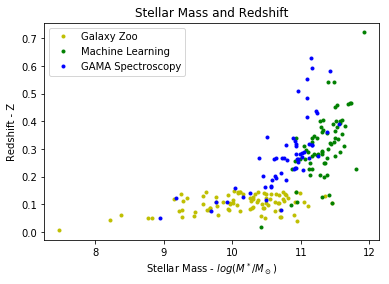

In [7]:
plt.plot(np.log10(zoo_hard_cut.STELLAR_MASS), zoo_hard_cut.Z, 'y.',label='Galaxy Zoo')
plt.plot(np.log10(mac_hard_cut.STELLAR_MASS), mac_hard_cut.Z, 'g.',label='Machine Learning')
plt.plot(np.log10(spec_with_mass.STELLAR_MASS), spec_with_mass.Z, 'b.',label='GAMA Spectroscopy')

plt.xlabel(r"Stellar Mass - $log(M^*/M_\odot)$")
plt.ylabel("Redshift - Z")
plt.title("Stellar Mass and Redshift")
plt.legend(loc='best')
plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/Stellar_mass_to_redshift_plot_revised.pdf')

plt.show()

# New Overlaps with new Zoo cuts
## Hard cut
Mac/Zoo = 2
Mac/Spec = 4
Spec/Zoo = 0

In [8]:
pd.merge(zoo_hard_cut, mac_with_mass, on = 'GAMA_ID', how = 'inner')

,GAMA_ID,RA_x,DEC_x,LENS_SCORE,STELLAR_MASS_x,Z_x,NONE,RING,LENS,IRREGULAR,...,DUST_LANE,OVERLAPPING,Unnamed: 0,Unnamed: 0.1,ID,RA_y,DEC_y,SCORE,STELLAR_MASS_y,Z_y
0,124486,179.72998,-2.51919,0.426190,8.541000e+10,0.1435,0.243537,0.0,0.426190,0.060884,...,0.00000,0.121769,158,158,2553.0,179.73003,-2.51895,28.0,8.541000e+10,0.1435
1,136604,175.87349,-1.74167,0.316451,2.866000e+11,0.1060,0.071956,0.0,0.316451,0.087558,...,0.02621,0.273830,300,300,1642.0,175.87355,-1.74164,58.0,2.866000e+11,0.1060


In [9]:
pd.merge(zoo_hard_cut, spec_with_mass, on = 'GAMA_ID', how = 'inner')

,GAMA_ID,RA_x,DEC_x,LENS_SCORE,STELLAR_MASS_x,Z_x,NONE,RING,LENS,IRREGULAR,...,OVERLAPPING,Unnamed: 0,Unnamed: 0.1,RA_y,DEC_y,z1,z2,spec_type,STELLAR_MASS_y,Z_y


## Pulling candidates for cutouts/examples to discuss selection criteria.

### Zoo between 24-25% above 3/4 None
486863, 171642, 549071, 346206, 567471...
My visual assessment is 3 of the 5 may be lenses.

In [24]:
zoo_find_example1 = zoo_with_all_scores[(zoo_with_all_scores.LENS >= 0.24) &
                                   (zoo_with_all_scores.LENS <= 0.25) &
                                        (zoo_with_all_scores.LENS >= (3/4)*zoo_with_all_scores.NONE) &
                                          (zoo_with_all_scores.LENS >= zoo_with_all_scores.RING) &
                                          (zoo_with_all_scores.LENS >= zoo_with_all_scores.IRREGULAR) &
                                          (zoo_with_all_scores.LENS >= zoo_with_all_scores.OTHER) &
                                          (zoo_with_all_scores.LENS >= zoo_with_all_scores.DUST_LANE) &
                                          (zoo_with_all_scores.LENS >= zoo_with_all_scores.OVERLAPPING) &
                                         (zoo_with_all_scores.Z.notnull())]
zoo_find_example1.GAMA_ID.tolist()

[486863, 171642, 549071, 346206, 567471, 320372]

### Zoo between 24-25% between 1/2 and 3/4 None
544051, 300880, 143533, 137441, 271487... My visual assessment is 4 of the 5 may be lenses.

In [21]:
zoo_find_example2 = zoo_with_all_scores[(zoo_with_all_scores.LENS >= 0.24) &
                                   (zoo_with_all_scores.LENS <= 0.25) &
                                        (zoo_with_all_scores.LENS >= (1/2)*zoo_with_all_scores.NONE) &
                                        (zoo_with_all_scores.LENS <= (3/4)*zoo_with_all_scores.NONE) &
                                          (zoo_with_all_scores.LENS >= zoo_with_all_scores.RING) &
                                          (zoo_with_all_scores.LENS >= zoo_with_all_scores.IRREGULAR) &
                                          (zoo_with_all_scores.LENS >= zoo_with_all_scores.OTHER) &
                                          (zoo_with_all_scores.LENS >= zoo_with_all_scores.DUST_LANE) &
                                          (zoo_with_all_scores.LENS >= zoo_with_all_scores.OVERLAPPING) &
                                         (zoo_with_all_scores.Z.notnull())]
zoo_find_example2.GAMA_ID.tolist()

[544051, 300880, 143533, 137441, 271487, 227191, 93271, 569602, 92491]

### Zoo between 24-25% and greater than None.
486863... My visual assessment is that it is not much more reliable than the other sets.

In [25]:
zoo_find_example3 = zoo_with_all_scores[(zoo_with_all_scores.LENS >= 0.24) &
                                   (zoo_with_all_scores.LENS <= 0.25) &
                                        (zoo_with_all_scores.LENS >= zoo_with_all_scores.NONE) &
                                        (zoo_with_all_scores.LENS >= zoo_with_all_scores.RING) &
                                          (zoo_with_all_scores.LENS >= zoo_with_all_scores.IRREGULAR) &
                                          (zoo_with_all_scores.LENS >= zoo_with_all_scores.OTHER) &
                                          (zoo_with_all_scores.LENS >= zoo_with_all_scores.DUST_LANE) &
                                          (zoo_with_all_scores.LENS >= zoo_with_all_scores.OVERLAPPING) &
                                         (zoo_with_all_scores.Z.notnull())]
zoo_find_example3.GAMA_ID.tolist()

[486863]

### Mac score 4
345716.0,
 371549.0,
 386213.0,
 517068.0,
 3585654.0... My visual assessment is 2.5/5 may be lenses.

In [22]:
mac_4_example = mac_with_mass[mac_with_mass.SCORE == 4]
mac_4_example.GAMA_ID.tolist()

[347735.0,
 205060.0,
 208601.0,
 3908476.0,
 301292.0,
 514128.0,
 345881.0,
 323200.0,
 3626517.0,
 3898249.0,
 323638.0,
 575209.0,
 209548.0,
 3587969.0,
 3911772.0,
 204098.0,
 3579761.0,
 371604.0,
 324417.0,
 381602.0,
 302278.0,
 3897932.0,
 302198.0,
 549447.0,
 518046.0,
 372022.0,
 418840.0,
 387617.0,
 518676.0,
 215373.0,
 204881.0,
 345595.0,
 387244.0,
 575245.0,
 642024.0,
 375921.0,
 422178.0,
 345716.0,
 371549.0,
 386213.0,
 517068.0,
 3585654.0,
 3611088.0,
 214595.0,
 622085.0,
 3609514.0,
 3616694.0,
 3599660.0,
 208755.0,
 324461.0,
 279786.0,
 373093.0,
 517251.0,
 345423.0,
 231213.0,
 143928.0,
 559216.0,
 231431.0,
 24397.0,
 179666.0,
 55314.0,
 69781.0,
 611249.0,
 55815.0,
 163592.0,
 71440.0,
 40316.0,
 23705.0,
 32615.0,
 272448.0,
 177351.0,
 56108.0,
 271912.0,
 273287.0,
 171877.0,
 143144.0,
 611334.0,
 171454.0,
 172095.0,
 99618.0,
 165939.0,
 69466.0,
 219807.0,
 290269.0,
 165812.0,
 179269.0,
 220682.0,
 583789.0,
 69809.0,
 186109.0,
 145196.0,

### Mac score 14
138582.0, 84533.0, 249961.0, 278118.0, 569022.0... My visual asssessment is 4/5 may be lenses.

In [23]:
mac_14_example = mac_with_mass[mac_with_mass.SCORE == 14]
mac_14_example.GAMA_ID.tolist()

[138582.0, 84533.0, 249961.0, 278118.0, 569022.0]